# Basic test

##### TODO: Delete or adapt the name and contents of this notebook

Tests the basic model defined in the `ContinuousModel` directory, instantiating bees, hives and resources

In [1]:
# Allows to make changes to the classes without restarting the notebook 💀 # TODO: Delete once done
%load_ext autoreload
%autoreload 2

In [2]:
from src.model.agents.Hive import Hive
from src.model.agents.BeeSwarm import BeeSwarm
from src.model.agents.Resource import Resource
from src.model.Model import ForagerModel

from src.model.config.HiveConfig import HiveConfig
from src.model.config.BeeSwarmConfig import BeeSwarmConfig
from src.model.config.ResourceConfig import ResourceConfig
from src.model.config.ModelConfig import ModelConfig

from src.model.util.BeeState import BeeState

In [3]:
import mesa
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, expon

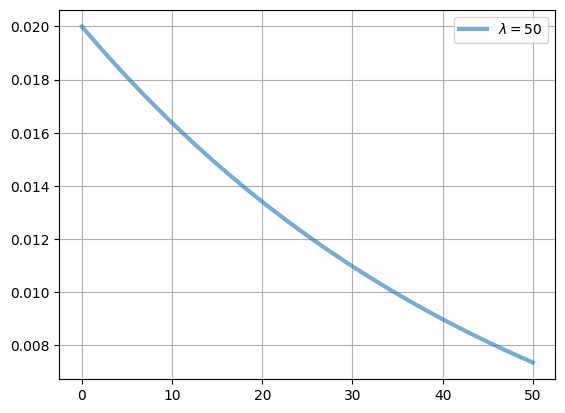

In [16]:
lambdas = [50]

for lam in lambdas:
    x = np.linspace(0, 50, 100)
    plt.plot(x, expon.pdf(x, scale=lam), lw=3, alpha=0.6, label=r'$\lambda=$'+f'{lam}')


plt.legend()
plt.grid()
plt.show()

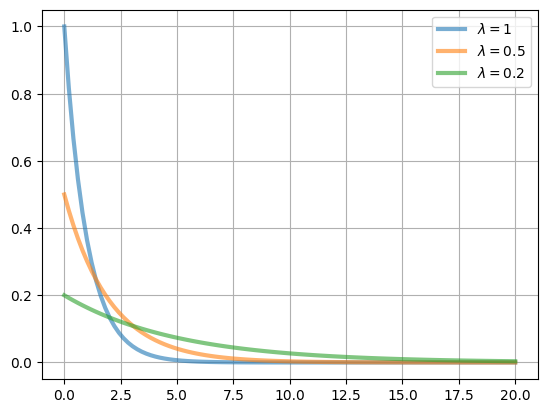

In [5]:
lambdas = [1, 0.5, 0.2]

for lam in lambdas:
    x = np.linspace(0, 20, 100)
    plt.plot(x, expon.pdf(x, scale=1/lam), lw=3, alpha=0.6, label=r'$\lambda=$'+f'{lam}')

plt.legend()
plt.grid()
plt.show()

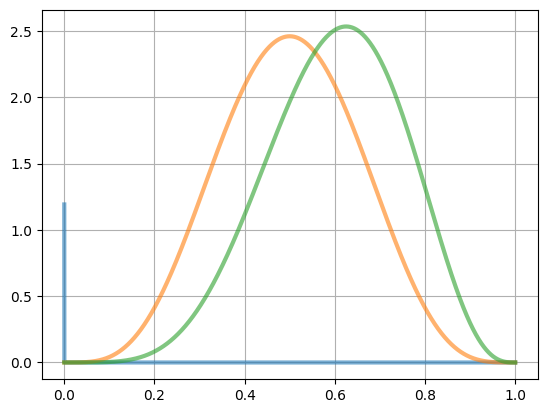

In [6]:
ays = [2, 2, 3]
bees = [2, 3, 2]

mus = [0.0, 0.5, 0.6]
phi = 10

for mu in mus:
    a = phi * (mu + np.finfo(np.float32).eps)
    b = phi * (1 - mu - np.finfo(np.float32).eps)

    x = np.linspace(0, 1, 1000000)
    rvs = beta.rvs(a, b, size=1000)
    plt.plot(x, beta.pdf(x, a, b), lw=3, alpha=0.6, label='beta pdf')

# plt.legend()
plt.grid()
plt.show()

In [7]:
beta.rvs(a, b)

0.578548783031373

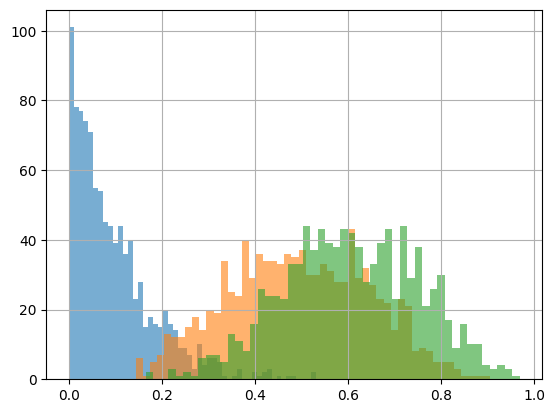

In [8]:
ays = [2, 2, 3]
bees = [2, 3, 2]

mus = [0.1, 0.5, 0.6]
phi = 10

for mu in mus:
    a = phi * mu
    b = phi * (1 - mu)

    x = np.linspace(0, 1, 100)
    rvs = beta.rvs(a, b, size=1000)
    # plt.plot(x, beta.pdf(x, a, b), lw=3, alpha=0.6, label='beta pdf')
    plt.hist(rvs, alpha=0.6, bins=50)

# plt.legend()
plt.grid()
plt.show()

## Instantiate model

In [9]:
# constant params adjusted
beeswarm_config = BeeSwarmConfig()
hive_config = HiveConfig()
resource_config = ResourceConfig()
model_config = ModelConfig()

model = ForagerModel(model_config, hive_config, beeswarm_config, resource_config, 100.0)

In [10]:
for _ in range(100):
    foragers = model.get_agents_of_type(BeeSwarm)
    print(f"Chuj: {len(foragers)}")
    foragers = list(filter(lambda bee : bee.state == BeeState.EXPLORING, foragers))
    print(f"Dupa: {len(foragers)}")

    model.step()

Chuj: 200
Dupa: 0
Chuj: 200
Dupa: 121
Chuj: 200
Dupa: 166
Chuj: 199
Dupa: 179
Chuj: 199
Dupa: 185
Chuj: 199
Dupa: 185
Chuj: 199
Dupa: 189
Chuj: 197
Dupa: 184
Chuj: 197
Dupa: 184
Chuj: 195
Dupa: 180
Chuj: 194
Dupa: 176
Chuj: 190
Dupa: 174
Chuj: 189
Dupa: 172
Chuj: 188
Dupa: 175
Chuj: 187
Dupa: 172
Chuj: 185
Dupa: 171
Chuj: 184
Dupa: 169
Chuj: 181
Dupa: 162
Chuj: 180
Dupa: 163
Chuj: 179
Dupa: 164
Chuj: 179
Dupa: 164
Chuj: 178
Dupa: 163
Chuj: 178
Dupa: 163
Chuj: 175
Dupa: 155
Chuj: 173
Dupa: 152
Chuj: 173
Dupa: 153
Chuj: 172
Dupa: 149
Chuj: 170
Dupa: 143
Chuj: 168
Dupa: 138
Chuj: 168
Dupa: 135
Chuj: 168
Dupa: 135
Chuj: 166
Dupa: 128
Chuj: 163
Dupa: 118
Chuj: 160
Dupa: 115
Chuj: 158
Dupa: 108
Chuj: 158
Dupa: 100
Chuj: 157
Dupa: 96
Chuj: 156
Dupa: 91
Chuj: 154
Dupa: 84
Chuj: 154
Dupa: 77
Chuj: 151
Dupa: 79
Chuj: 151
Dupa: 77
Chuj: 149
Dupa: 76
Chuj: 147
Dupa: 79
Chuj: 145
Dupa: 74
Chuj: 144
Dupa: 75
Chuj: 141
Dupa: 73
Chuj: 141
Dupa: 73
Chuj: 138
Dupa: 73
Chuj: 136
Dupa: 72
Chuj: 135
Dupa: 

ZeroDivisionError: float division by zero

[   0.   60.  120.  180.  240.  300.  360.  420.  480.  540.  600.  660.
  720.  780.  840.  900.  960. 1020. 1080. 1140. 1200.]


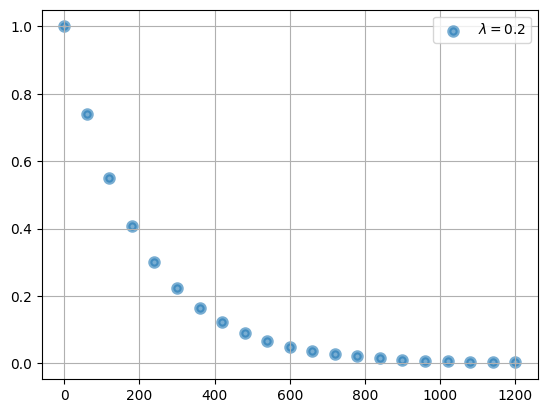

In [ ]:
MINUTE = 60

max_ready_time = 20 * MINUTE
dt = MINUTE

dts = np.linspace(0, max_ready_time, max_ready_time // dt + 1)
print(dts)
plt.scatter(dts, expon.sf(dts, scale=2e2), lw=3, alpha=0.6, label=r'$\lambda=$'+f'{lam}')

plt.legend()
plt.grid()
plt.show()

In [ ]:
from time import time

start = time()

for _ in range(1):
    model.step()

end = time()

print(end - start)

0.018947839736938477
